# Combining Datasets

In [2]:
# Opening the CVS "track1/drivinglog.csv"

# !pip install pandas
# !pip install numpy
# !pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    


def loadAndAddTrackAndDrivingLine(filepath, track, driving_line):
    df = pd.read_csv(filepath+"/VehicleData.txt", sep=" ", header=None, names=["Img", "throttle", "brake", "steering_angle"])
    df["track"] = track
    df["driving_line"] = driving_line


    # Create relative path
    # TODO: Has to be changed to just one image in next release
    df["image_path"] = df["Img"].apply(lambda x: filepath + "/IMG/" + x.split("/")[-2] + "/" + x.split("/")[-1])
    #df["relLeftImg"] = df["leftImg"].apply(lambda x: filepath + "/IMG/" + x.split("/")[-2] + "/" + x.split("/")[-1])
    #df["relRightImg"] = df["rightImg"].apply(lambda x: filepath + "/IMG/"+ x.split("/")[-2] + "/" + x.split("/")[-1])

    return df
df = loadAndAddTrackAndDrivingLine("../data/training/automatic_driving_58000imgs", "city",  "alwaysTurnRight")
# df = pd.concat([df, loadAndAddTrackAndDrivingLine("../data/track1_2", "track1",  "left")])
# df = pd.concat([df, loadAndAddTrackAndDrivingLine("../data/track1_3", "track1",  "right")])
# df = pd.concat([df, loadAndAddTrackAndDrivingLine("../data/track1_4", "track1",  "center")])
# df = pd.concat([df, loadAndAddTrackAndDrivingLine("../data/track1_5", "track1",  "center")])

df["current_speed"] = 0 # TODO: Add speed through simulation, adding dummy for now

In [3]:
# Training Data Adjustments
# for all cars driven on the left side, steer angle is adjusted by +0.25
# for all cars driven on the right side, steer angle is adjusted by -0.25

def adjust_steering_angle(x):
    if x["driving_line"] == "left":
        return x["steering_angle"] + 0.15
    elif x["driving_line"] == "right":
        return x["steering_angle"] - 0.15
    else:
        return x["steering_angle"]
    
df["steering_angle"] = df.apply(lambda x: adjust_steering_angle(x), axis=1)

In [4]:
df.describe()

,throttle,brake,steering_angle,current_speed
count,58009.000000,58009.000000,58009.000000,58009.0
mean,2258.211053,8556.635499,0.031616,0.0
std,1570.916998,9785.179707,2.885331,0.0
min,13.473060,0.000000,-29.821120,0.0
25%,203.573700,0.000000,-0.000204,0.0
50%,3328.185000,222.049000,0.000007,0.0
75%,3600.000000,20000.000000,0.002202,0.0
max,3600.000000,20000.000000,27.900890,0.0


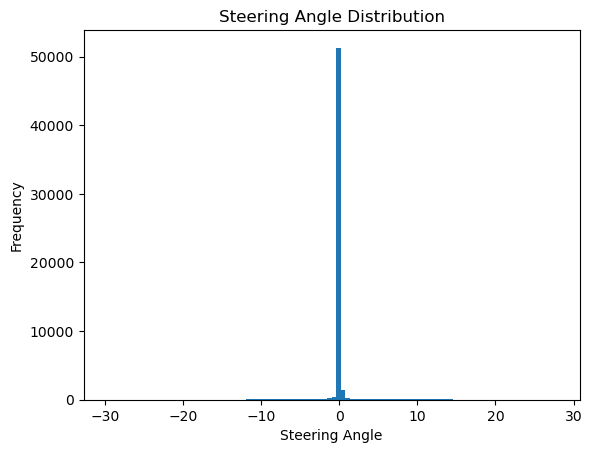

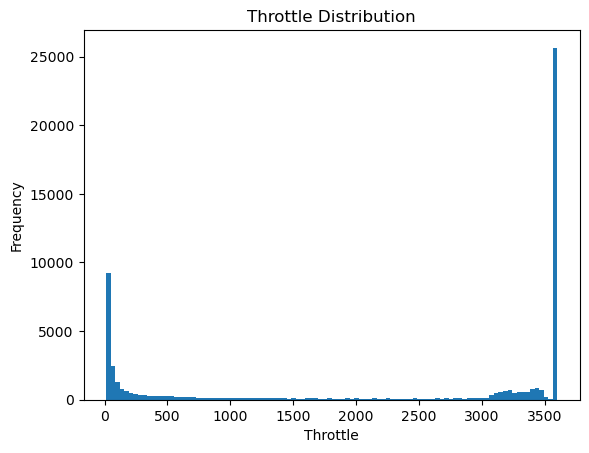

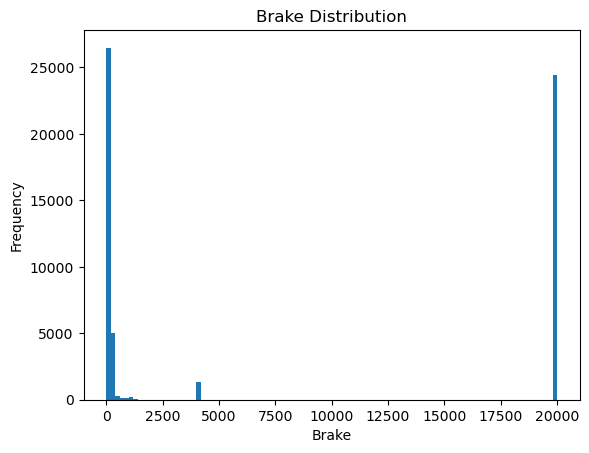

In [5]:
# Distribution of Steering Angle, Name of Chart: "Steering Angle Distribution"
import matplotlib.pyplot as plt
plt.hist(df["steering_angle"], bins=100)
plt.title("Steering Angle Distribution")
plt.xlabel("Steering Angle")
plt.ylabel("Frequency")
plt.show()

# Distribution of Throttle, Name of Chart: "Throttle Distribution"
plt.hist(df["throttle"], bins=100)
plt.title("Throttle Distribution")
plt.xlabel("Throttle")
plt.ylabel("Frequency")
plt.show()

# Distribution of Brake, Name of Chart: "Break Distribution"
plt.hist(df["brake"], bins=100)
plt.title("Brake Distribution")
plt.xlabel("Brake")
plt.ylabel("Frequency")
plt.show()

(array([46710.,     0.,  2682.,     0.,     0.,  1893.,     0.,  2804.,
            0.,  3920.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

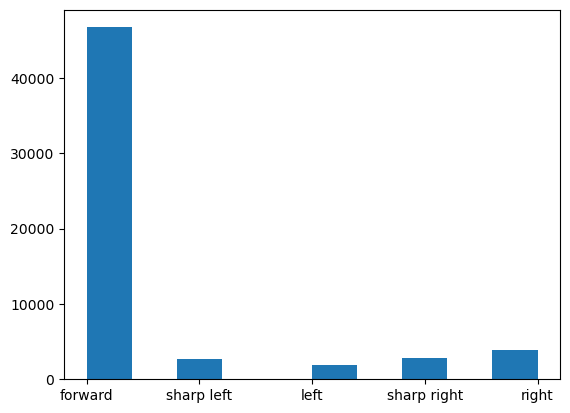

In [6]:
# Sorting Data in different kinds
# Adding a column "steering_angle_abs" to the dataframe
df["steering_angle_abs"] = df["steering_angle"].apply(lambda x: abs(x))

# Add a column # direction of steering for forward, left, sharp left, right, sharp right
# If steering angle is between -0.1 and 0.1, then it is forward
# If steering angle is between -0.5 and -0.1, then it is left
# If steering angle is between -1 and -0.5, then it is sharp left
# If steering angle is between 0.1 and 0.5, then it is right
# If steering angle is between 0.5 and 1, then it is sharp right

def steering_direction(x):
    if x > 0.5:
        return "sharp right"
    elif x > 0.025:
        return "right"
    elif x > -0.025:
        return "forward"
    elif x > -0.4:
        return "left"
    else:
        return "sharp left"
    
df["steering_direction"] = df["steering_angle"].apply(lambda x: steering_direction(x))

# Show the distribution of steering direction in a chart
plt.hist(df["steering_direction"])

In [7]:
# Saving the new dataframe to a CSV
df.to_csv("../data/training/automatic_driving_58000imgs/driving_log.csv", index=False)

In [8]:
# remove all where brake is not 0
df = df[df["brake"] == 0]
# save to csv
df.to_csv("../data/training/automatic_driving_58000imgs/driving_log.csv", index=False)